In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show


for i, img in tqdm(enumerate(os.listdir('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/cards/cards'))):
    label=i
    print('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/cards/cards'+img)
    img = cv2.imread('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/cards/cards/'+img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=45, brightness_range=(0.8, 1.2), zoom_range=[.1, .4])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    for x in range(100):
        img_transformed=image_iterator.next()[0].astype('int')/255
        imageData.append(img_transformed)
        labelData.append(label)

zipped=list(zip(imageData,labelData))

shuffle(zipped)

imageData, labelData = zip(*zipped)

imageDataT = imageData[2340:]
labelDataT = labelData[2340:]

imageData = imageData[:2340]
labelData = labelData[:2340]




0it [00:00, ?it/s]

C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/cards/cardsIMG_1358.png


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [2]:

train_images = []
train_ids = []
for i in range(len(imageData)):
    train_images.append(imageData[i])
    train_ids.append(labelData[i])

train_images = np.array(train_images)
train_ids = np.array(train_ids, dtype=float)  # Convert labels to floats

test_images = []
test_ids = []
for i in range(len(imageDataT)):
    test_images.append(imageDataT[i])
    test_ids.append(labelDataT[i])

test_images = np.array(test_images)
test_ids = np.array(test_ids, dtype=float)



print('success')

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=50
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])

model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)



model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_images, train_ids, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_ids), callbacks=[cp]).history




success


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 1

C:\Users\nmb20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


74/74 [==============================] - 41s 548ms/step - loss: 3.3875 - accuracy: 0.1244 - val_loss: 2.5071 - val_accuracy: 0.2308
Epoch 3/50
74/74 [==============================] - 40s 537ms/step - loss: 1.9908 - accuracy: 0.4218 - val_loss: 2.3524 - val_accuracy: 0.2692
Epoch 4/50
74/74 [==============================] - 38s 520ms/step - loss: 1.0322 - accuracy: 0.7009 - val_loss: 1.2850 - val_accuracy: 0.6231
Epoch 5/50
74/74 [==============================] - 38s 519ms/step - loss: 0.5558 - accuracy: 0.8316 - val_loss: 1.5884 - val_accuracy: 0.6192
Epoch 6/50
74/74 [==============================] - 38s 518ms/step - loss: 0.3105 - accuracy: 0.9064 - val_loss: 1.3521 - val_accuracy: 0.6231
Epoch 7/50
74/74 [==============================] - 39s 530ms/step - loss: 0.2312 - accuracy: 0.9278 - val_loss: 0.7682 - val_accuracy: 0.8423
Epoch 8/50
74/74 [==============================] - 39s 521ms/step - loss: 0.1635 - accuracy: 0.9513 - val_loss: 0.7219 - val_accuracy: 0.8577
Epoch 9/50

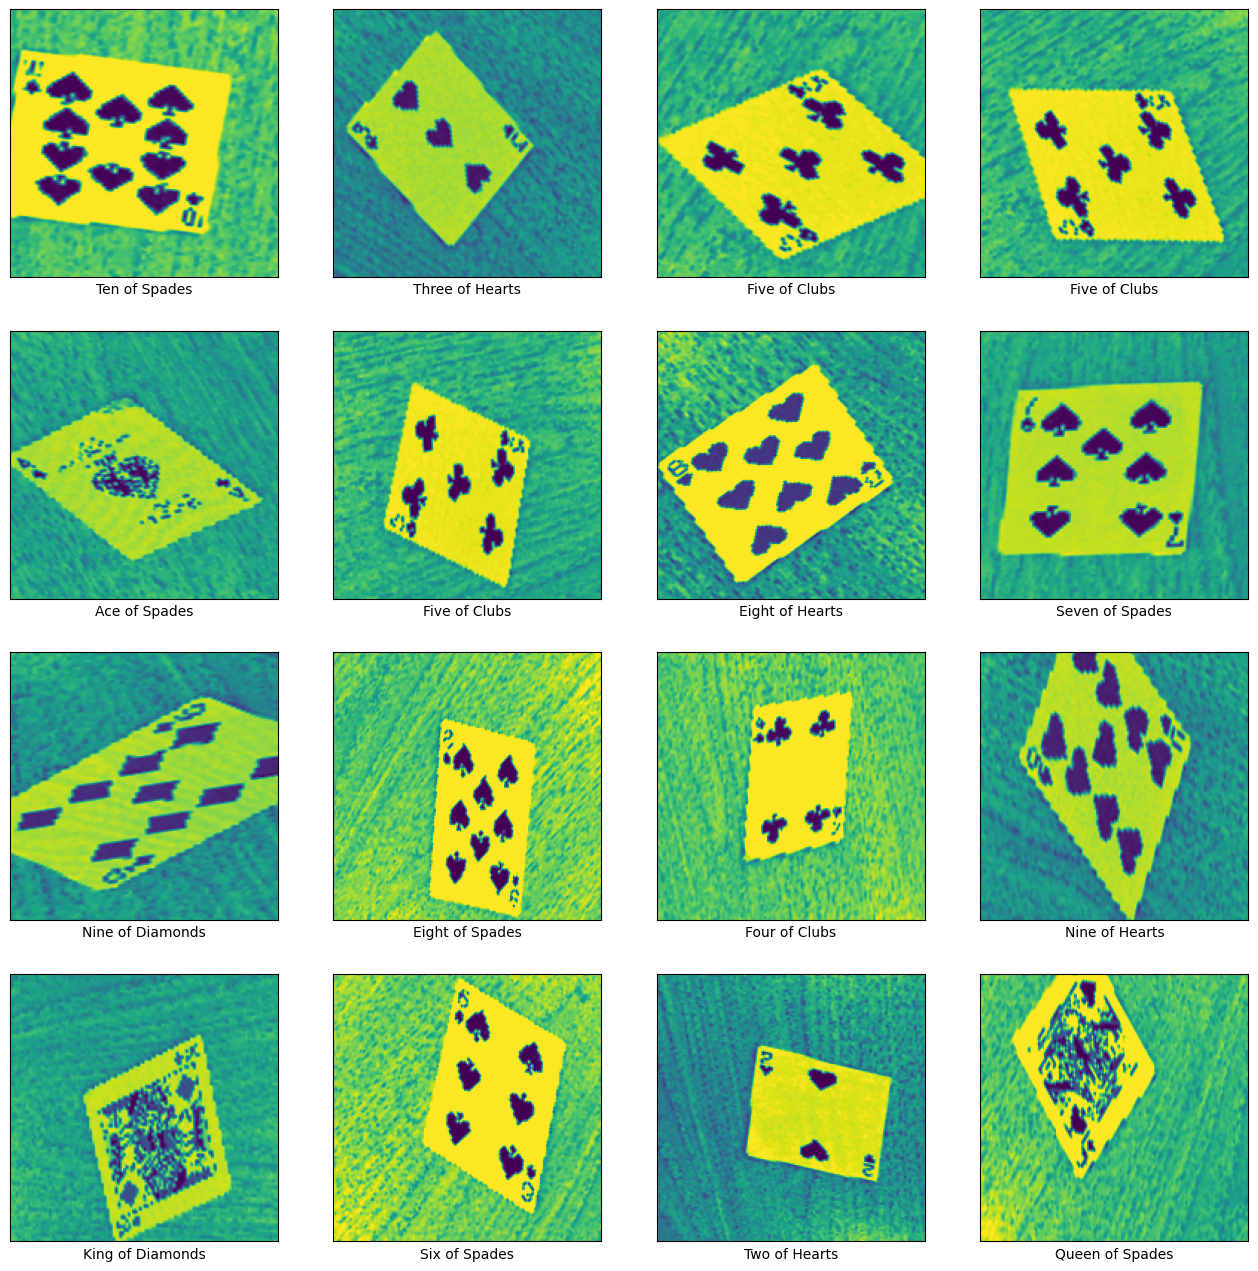

INFO:tensorflow:Assets written to: goodModel2\assets


INFO:tensorflow:Assets written to: goodModel2\assets


In [18]:
# arr = np.array(['C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/test/test/600x600.jpg'])
# predictions=model.predict(arr)
# card_map = {
#     1: "Ace of Hearts",
#     2: "Three of Diamonds",
#     3: "Jack of Hearts",
#     4: "Seven of Spades",
#     5: "Seven of Clubs",
#     6: "Queen of Spades",
#     7: "Three of Hearts",
#     8: "Queen of Clubs",
#     9: "King of Diamonds",
#     10: "Ace of Spades",
#     11: "Ten of Hearts",
#     12: "Three of Spades",
#     13: "Four of Spades",
#     14: "Six of Spades",
#     15: "Seven of Hearts",
#     16: "Five of Spades",
#     17: "Four of Clubs",
#     18: "Nine of Spades",
#     19: "Ten of Clubs",
#     20: "Six of Diamonds",
#     21: "Nine of Diamonds",
#     22: "Two of Hearts",
#     23: "Jack of Clubs",
#     24: "Ten of Diamonds",
#     25: "Nine of Clubs",
#     26: "Nine of Hearts",
#     27: "Ace of Diamonds",
#     28: "Two of Clubs",
#     29: "Five of Diamonds",
#     30: "King of Clubs",
#     31: "Queen of Diamonds",
#     32: "Eight of Hearts",
#     33: "Two of Diamonds",
#     34: "Six of Hearts",
#     35: "Eight of Clubs",
#     36: "Eight of Spades",
#     37: "Four of Hearts",
#     38: "King of Hearts",
#     39: "Two of Spades",
#     40: "Five of Clubs",
#     41: "Jack of Spades",
#     42: "Three of Clubs",
#     43: "Ten of Spades",
#     44: "Five of Hearts",
#     45: "Jack of Diamonds",
#     46: "Ace of Clubs",
#     47: "Seven of Diamonds",
#     48: "Queen of Hearts",
#     49: "King of Spades",
#     50: "Four of Diamonds",
#     51: "Eight of Diamonds",
#     52: "Six of Clubs"
# }

# predictions=model.predict(test_images)
# sample=test_images[:16]

# print(predictions[0])


# for t, s in enumerate(predictions[:16]):
    
#     biggest = 0
#     biggestIndex = -1
#     for i in range(53):
#         if s[i] > biggest:
#             biggest = s[i]
#             biggestIndex = i

#     print(biggest,biggestIndex)
#     print(card_map[biggestIndex])

card_map = {
    0: "Eight of Hearts",
    1: "Three of Diamonds",
    2: "Three of Clubs",
    3: "Nine of Spades",
    4: "Four of Diamonds",
    5: "Six of Diamonds",
    6: "Queen of Clubs",
    7: "Eight of Diamonds",
    8: "King of Spades",
    9: "Three of Hearts",
    10: "Jack of Diamonds",
    11: "Five of Hearts",
    12: "Six of Clubs",
    13: "Nine of Hearts",
    14: "Four of Clubs",
    15: "Jack of Clubs",
    16: "Five of Diamonds",
    17: "Seven of Clubs",
    18: "King of Hearts",
    19: "Ten of Spades",
    20: "Two of Spades",
    21: "Nine of Clubs",
    22: "Two of Diamonds",
    23: "Three of Spades",
    24: "Eight of Spades",
    25: "Two of Hearts",
    26: "Two of Clubs",
    27: "Ace of Hearts",
    28: "Queen of Diamonds",
    29: "Jack of Hearts",
    30: "Ten of Hearts",
    31: "Seven of Diamonds",
    32: "Jack of Spades",
    33: "Queen of Spades",
    34: "Four of Hearts",
    35: "Six of Hearts",
    36: "Seven of Hearts",
    37: "Four of Spades",
    38: "Ten of Clubs",
    39: "Six of Spades",
    40: "Eight of Clubs",
    41: "Ten of Diamonds",
    42: "Five of Clubs",
    43: "Ace of Clubs",
    44: "King of Clubs",
    45: "King of Diamonds",
    46: "Nine of Diamonds",
    47: "Ace of Spades",
    48: "Five of Spades",
    49: "Seven of Spades",
    50: "Ace of Diamonds",
    51: "Queen of Hearts"
}

predictions=model.predict_on_batch(test_images)
sample=test_images[:16]

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
    biggestIndex=-1
    biggest=0
    for j in range(52):
        if predictions[i][j] > biggest:
            biggest = predictions[i][j]
            biggestIndex = j
    plt.xlabel(card_map[biggestIndex])
plt.show()

model.save('goodModel2')



In [7]:
print(os.getcwd())

C:\Users\nmb20
